<a href="https://colab.research.google.com/github/ishanjogalekar/Epsilon/blob/main/Epsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Epsilon 3.0 - The Analytics Case Competition

**Team Rangers**
1. Anshuman Phadke
2. Ishan Jogalekar

---

**Importing Libraries**


In [ ]:
# Import libs
import pandas as pd
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv("https://raw.githubusercontent.com/ishanjogalekar/Epsilon/main/Epsilon.csv")
df.describe()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Loan Number,Application Signed Hour,Age,Applied Amount,Amount,Interest,Loan Duration,Monthly Payment,Income From Principal Employer,Income From Pension,Income Other,Liabilities Total,Probability Of Default,Principal Payments Made,Interest And Penalty Payments Made,Principal Write Offs,Interest And Penalty Write Offs,Principal Balance,Interest And Penalty Balance,No. Of Previous Loans Before Loan
count,1.800700e+04,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,18007.000000,15322.000000,15322.000000,18007.000000,18007.000000,18007.000000
mean,6.376259e+05,13.733826,39.099406,3045.509891,2672.480569,34.426073,46.330982,125.472556,941.372663,58.783584,446.846607,745.299999,0.229486,1476.254264,868.832675,68.733514,296.319895,1133.716507,2218.652432,0.899539
std,4.899150e+05,4.621094,11.726468,2508.816833,2155.283563,23.827371,16.403067,136.609617,886.366826,261.229291,2510.939606,700.883593,0.167009,1721.583811,1248.132479,401.484270,1792.077750,1707.195549,5419.909309,1.675616
min,1.587900e+04,0.000000,18.000000,139.900000,130.000000,7.270000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001340,0.000000,0.000000,0.000000,0.000000,-11.810000,-2.660000,0.000000
25%,3.675390e+05,11.000000,30.000000,1060.000000,1060.000000,21.360000,36.000000,36.380000,0.000000,0.000000,0.000000,350.000000,0.102445,303.800000,116.190000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.189380e+05,14.000000,38.000000,2200.000000,2125.000000,29.750000,60.000000,91.820000,820.000000,0.000000,0.000000,581.000000,0.176800,895.000000,411.420000,0.000000,0.000000,382.850000,0.000000,0.000000
75%,6.358815e+05,17.000000,47.000000,4150.000000,3505.000000,37.990000,60.000000,166.840000,1400.000000,0.000000,500.000000,968.860000,0.312118,2083.265000,1119.600000,0.000000,0.000000,1734.265000,2186.855000,1.000000
max,2.277539e+06,23.000000,71.000000,10632.000000,10632.000000,263.590000,60.000000,2368.540000,18000.000000,3706.000000,280000.000000,30000.000000,0.950478,10632.000000,16088.670000,10629.990000,66859.730000,10629.990000,71784.200000,24.000000


In [ ]:
df.head()

,Loan ID,Loan Number,New Credit Customer,Loan Application Started Date,Loan Date,First Payment Date,Maturity Date Original,Maturity Date Last,Application Signed Hour,Application Signed Weekday,...,Status,Restructured,Principal Payments Made,Interest And Penalty Payments Made,Principal Write Offs,Interest And Penalty Write Offs,Principal Balance,Interest And Penalty Balance,No. Of Previous Loans Before Loan,Rating
0,87227056-6BF9-410C-98D1-008F788E122A,349381,True,20-03-2015 15:20,27-03-2015,04-05-2015,01-04-2020,01-04-2020,15,Wednesday,...,Late,False,464.73,355.92,0.00,0.00,1035.27,2833.83,0,F
1,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,True,13-12-2015 00:30,22-12-2015,01-02-2016,02-01-2020,02-01-2020,20,Wednesday,...,Late,False,0.01,0.00,0.00,0.00,1089.99,4215.37,0,G
2,BA1FC89D-44B5-4481-9FCD-00C4BBC174B0,430905,True,12-11-2015 12:58,19-11-2015,04-01-2016,01-12-2020,01-12-2020,0,Friday,...,Late,False,0.04,0.00,0.00,0.00,774.96,3283.25,0,G
3,932B0F92-8B44-499F-A056-00C6D6D1E312,473276,True,29-02-2016 10:25,29-02-2016,15-04-2016,15-03-2021,12-06-2019,15,Tuesday,...,Repaid,False,472.59,422.75,96.77,2.87,0.00,0.00,0,F
4,CDC5127D-AE6E-4BEC-9508-00FE1FB8FFE4,348441,True,17-03-2015 08:25,01-04-2015,25-05-2015,25-04-2016,25-04-2016,16,Thursday,...,Repaid,False,1000.00,403.89,0.00,0.00,0.00,0.00,0,G


## Data cleaning and Pre-processing

In [ ]:
df = df.dropna() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14234 entries, 0 to 14233
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Loan ID                             14234 non-null  object 
 1   Loan Number                         14234 non-null  int64  
 2   New Credit Customer                 14234 non-null  bool   
 3   Loan Application Started Date       14234 non-null  object 
 4   Loan Date                           14234 non-null  object 
 5   First Payment Date                  14234 non-null  object 
 6   Maturity Date Original              14234 non-null  object 
 7   Maturity Date Last                  14234 non-null  object 
 8   Application Signed Hour             14234 non-null  int64  
 9   Application Signed Weekday          14234 non-null  object 
 10  Verification Type                   14234 non-null  object 
 11  Age                                 14234

In [ ]:
df.isnull().values.any()

False

In [ ]:
# Printing columns
df.columns

Index(['Loan ID', 'Loan Number', 'New Credit Customer',
       'Loan Application Started Date', 'Loan Date', 'First Payment Date',
       'Maturity Date Original', 'Maturity Date Last',
       'Application Signed Hour', 'Application Signed Weekday',
       'Verification Type', 'Age', 'Gender', 'Country', 'Applied Amount',
       'Amount', 'Interest', 'Loan Duration', 'Monthly Payment', 'Use Of Loan',
       'Education', 'No. Of Dependants', 'Work Experience',
       'Income From Principal Employer', 'Income From Pension', 'Income Other',
       'Liabilities Total', 'Last Payment On', 'Probability Of Default',
       'Status', 'Restructured', 'Principal Payments Made',
       'Interest And Penalty Payments Made', 'Principal Write Offs',
       'Interest And Penalty Write Offs', 'Principal Balance',
       'Interest And Penalty Balance', 'No. Of Previous Loans Before Loan',
       'Rating'],
      dtype='object')

In [ ]:
# Unique data
df.nunique()

Loan ID                               14234
Loan Number                           14234
New Credit Customer                       2
Loan Application Started Date         14133
Loan Date                              1331
First Payment Date                      815
Maturity Date Original                 1376
Maturity Date Last                     1930
Application Signed Hour                  24
Application Signed Weekday                7
Verification Type                         4
Age                                      51
Gender                                    2
Country                                   4
Applied Amount                          228
Amount                                 1300
Interest                               3153
Loan Duration                            10
Monthly Payment                        8820
Use Of Loan                               9
Education                                 5
No. Of Dependants                        10
Work Experience                 

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True,keep=False)

---

**Creating separate dataframe for correlations**

In [ ]:
# Creating list with required datasets and parameters 
data = df[['Verification Type', 'Age', 'Gender', 'Country', 'Applied Amount',
       'Amount', 'Interest', 'Loan Duration', 'Monthly Payment', 'Use Of Loan',
       'Education', 'No. Of Dependants', 'Work Experience',
       'Income From Principal Employer', 'Income From Pension', 'Income Other',
       'Liabilities Total', 'Last Payment On', 'Probability Of Default',
       'Status', 'Restructured', 'Principal Payments Made',
       'Interest And Penalty Payments Made', 'Principal Write Offs',
       'Interest And Penalty Write Offs', 'Principal Balance',
       'Interest And Penalty Balance', 'No. Of Previous Loans Before Loan',
       'Rating']]
data.head()

,Verification Type,Age,Gender,Country,Applied Amount,Amount,Interest,Loan Duration,Monthly Payment,Use Of Loan,...,Status,Restructured,Principal Payments Made,Interest And Penalty Payments Made,Principal Write Offs,Interest And Penalty Write Offs,Principal Balance,Interest And Penalty Balance,No. Of Previous Loans Before Loan,Rating
0,III,42,Male,India,1500.0,1500.0,40.40,60,63.53,Debt Consolidation Loan,...,Late,False,464.73,355.92,0.00,0.00,1035.27,2833.83,0,F
1,IV,34,Female,India,1595.0,1090.0,68.39,48,101.19,Personal Loan,...,Late,False,0.01,0.00,0.00,0.00,1089.99,4215.37,0,G
2,IV,31,Female,India,3720.0,775.0,73.73,60,243.19,Personal Loan,...,Late,False,0.04,0.00,0.00,0.00,774.96,3283.25,0,G
3,III,22,Male,United States,635.0,635.0,42.66,60,27.12,Small Business Loan,...,Repaid,False,472.59,422.75,96.77,2.87,0.00,0.00,0,F
4,I,47,Male,India,1000.0,1000.0,61.49,12,116.95,Mortgage Loan,...,Repaid,False,1000.00,403.89,0.00,0.00,0.00,0.00,0,G


## Correlation and Heatmaps

In [ ]:
correlation1 = data.corr()
print(correlation1)

                                         Age  Applied Amount    Amount  \
Age                                 1.000000        0.069538  0.067308   
Applied Amount                      0.069538        1.000000  0.837179   
Amount                              0.067308        0.837179  1.000000   
Interest                           -0.086898       -0.028580 -0.153285   
Loan Duration                       0.066935        0.254240  0.232811   
Monthly Payment                     0.000432        0.601399  0.355933   
Income From Principal Employer      0.023310        0.225437  0.169084   
Income From Pension                 0.354798        0.006716 -0.002432   
Income Other                        0.001840        0.076399  0.041103   
Liabilities Total                   0.132072        0.236805  0.218588   
Probability Of Default             -0.169277       -0.018170 -0.143634   
Restructured                       -0.005043        0.068463  0.129560   
Principal Payments Made             0.

### Heat Map for correlations between all parameters

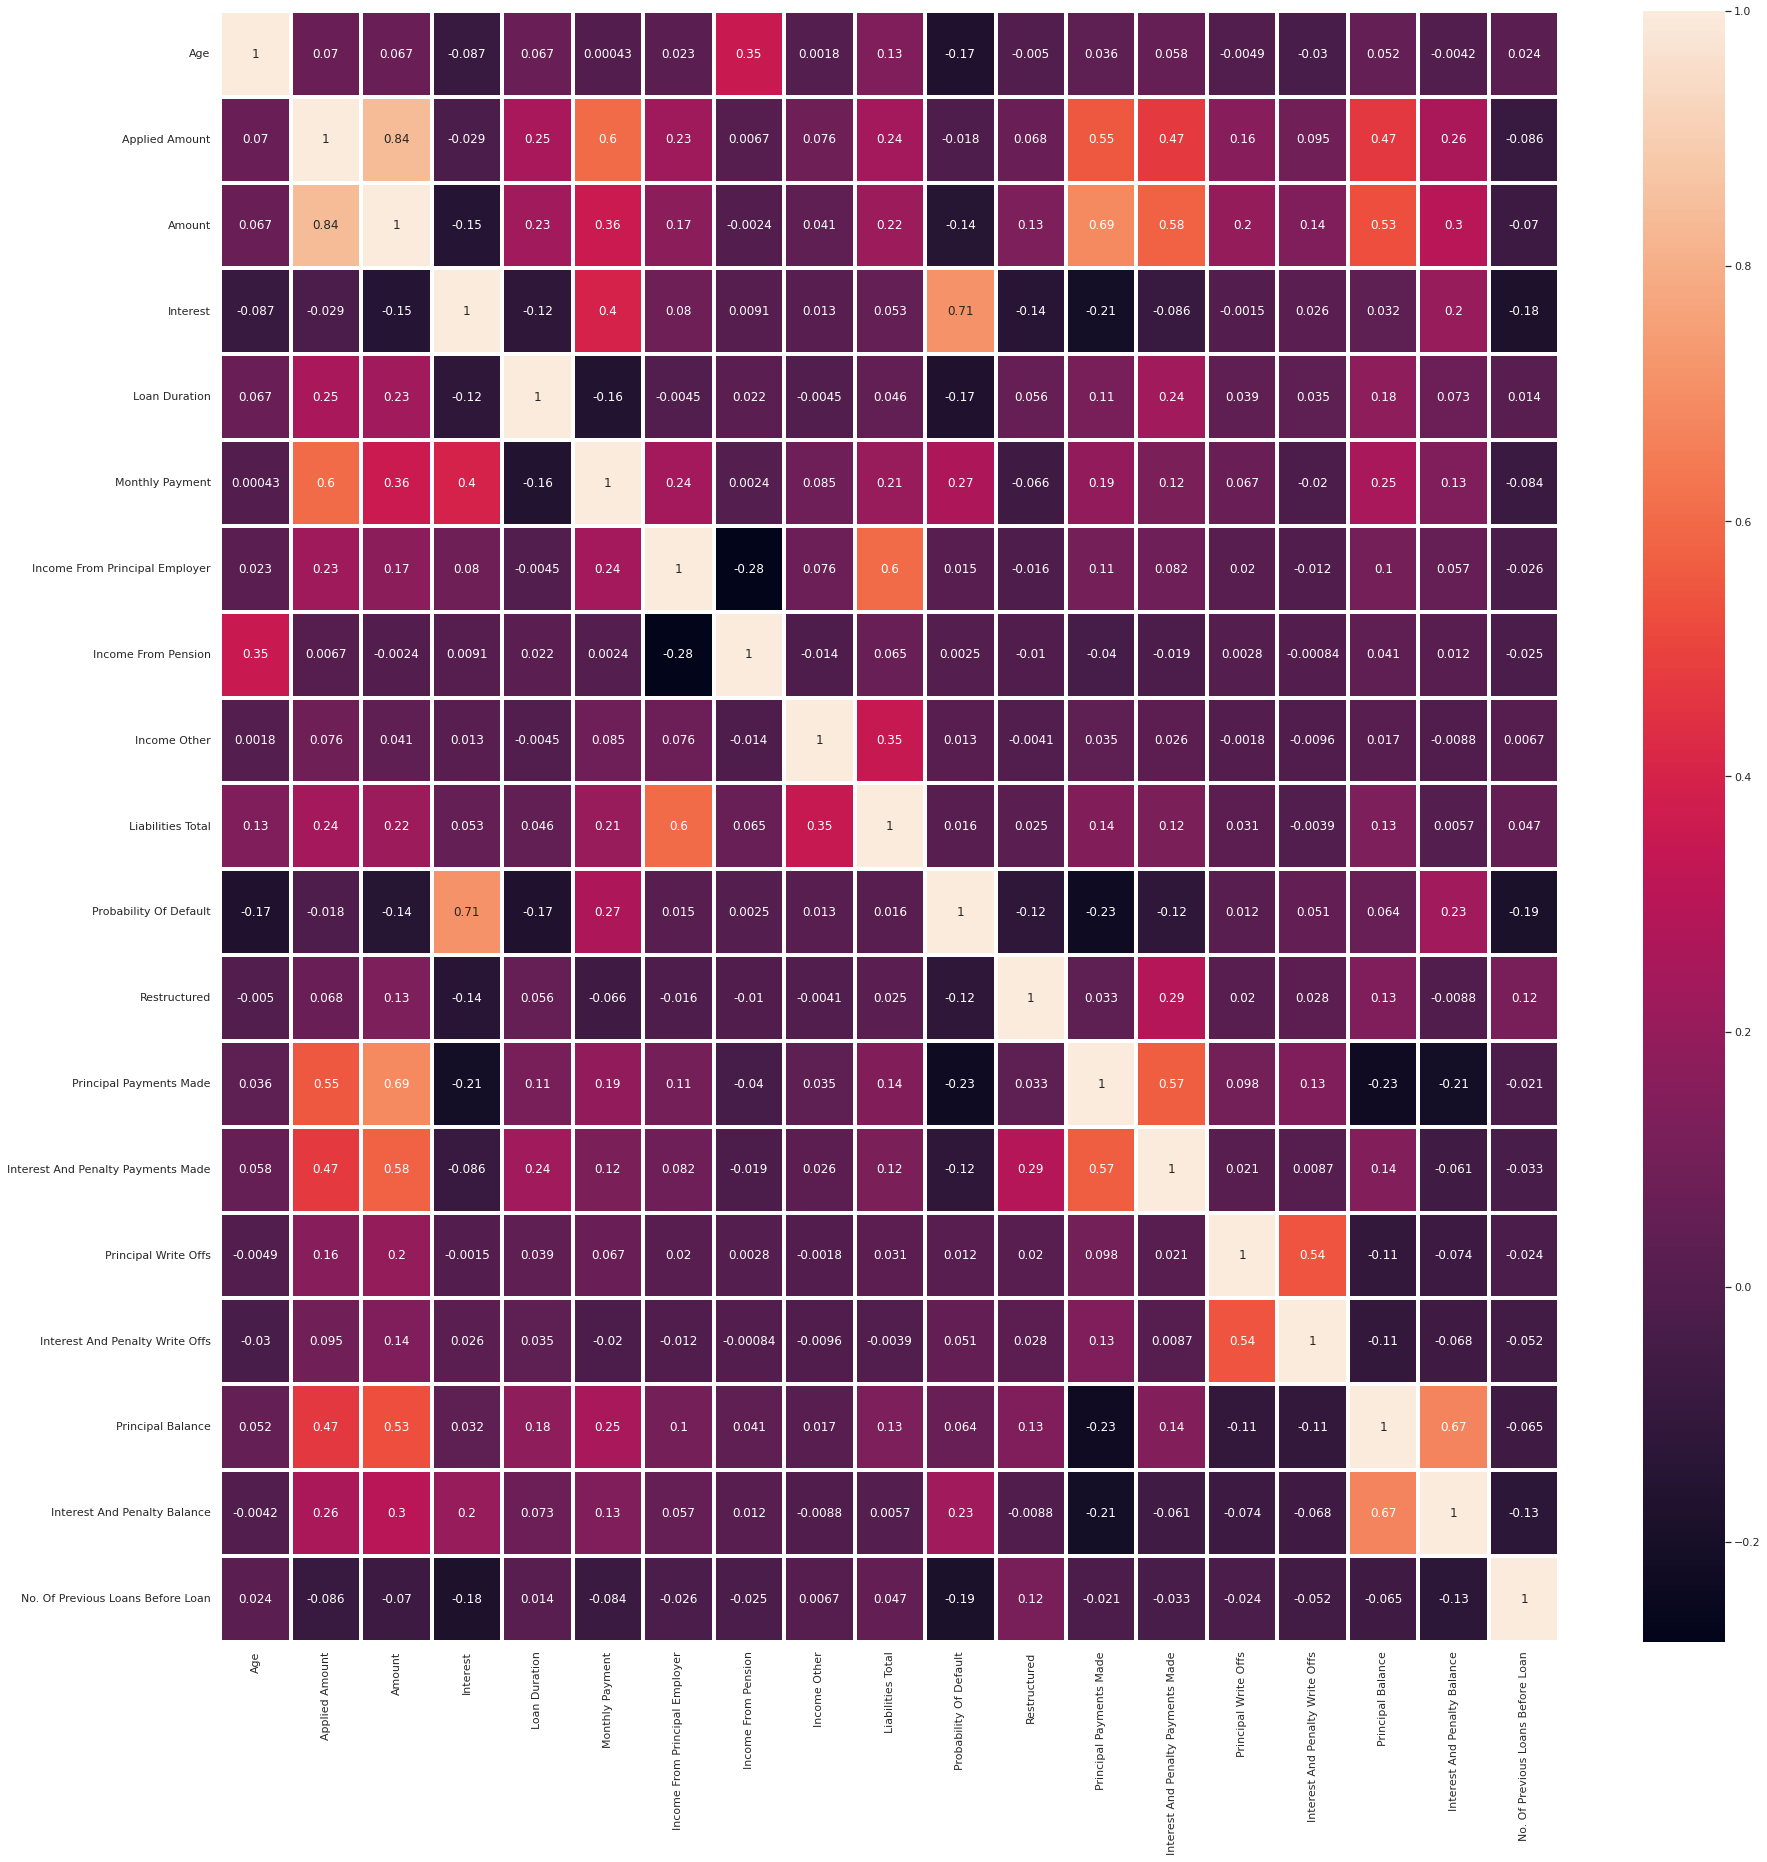

In [ ]:
# Heat map
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(correlation1, annot=True,linewidths=3, xticklabels=correlation1.columns, 
yticklabels=correlation1.columns, linecolor='white', cbar=True)

In [ ]:
data_new =df[[ 'Age', 'Gender',  'Applied Amount','Amount', 'Interest', 'Loan Duration', 'Monthly Payment', 'Use Of Loan',
       'Education', 'Work Experience','Income From Principal Employer',
       'Liabilities Total','Probability Of Default','Status', 'Restructured', 'Principal Payments Made','Principal Balance','Interest And Penalty Balance']]
data_new.head()
      

,Age,Gender,Applied Amount,Amount,Interest,Loan Duration,Monthly Payment,Use Of Loan,Education,Work Experience,Income From Principal Employer,Liabilities Total,Probability Of Default,Status,Restructured,Principal Payments Made,Principal Balance,Interest And Penalty Balance
0,42,Male,1500.0,1500.0,40.40,60,63.53,Debt Consolidation Loan,Higher Education,5To10Years,863.0,350.0,0.188726,Late,False,464.73,1035.27,2833.83
1,34,Female,1595.0,1090.0,68.39,48,101.19,Personal Loan,Middle School,5To10Years,0.0,940.0,0.749511,Late,False,0.01,1089.99,4215.37
2,31,Female,3720.0,775.0,73.73,60,243.19,Personal Loan,Middle School,10To15Years,970.0,960.0,0.453182,Late,False,0.04,774.96,3283.25
3,22,Male,635.0,635.0,42.66,60,27.12,Small Business Loan,Higher Education,2To5Years,745.0,250.0,0.408036,Repaid,False,472.59,0.00,0.00
4,47,Male,1000.0,1000.0,61.49,12,116.95,Mortgage Loan,High School,5To10Years,0.0,560.0,0.453182,Repaid,False,1000.00,0.00,0.00


In [ ]:
correlation2 = data_new.corr()

### Heatmap for correlation of lending patterns - primary factors

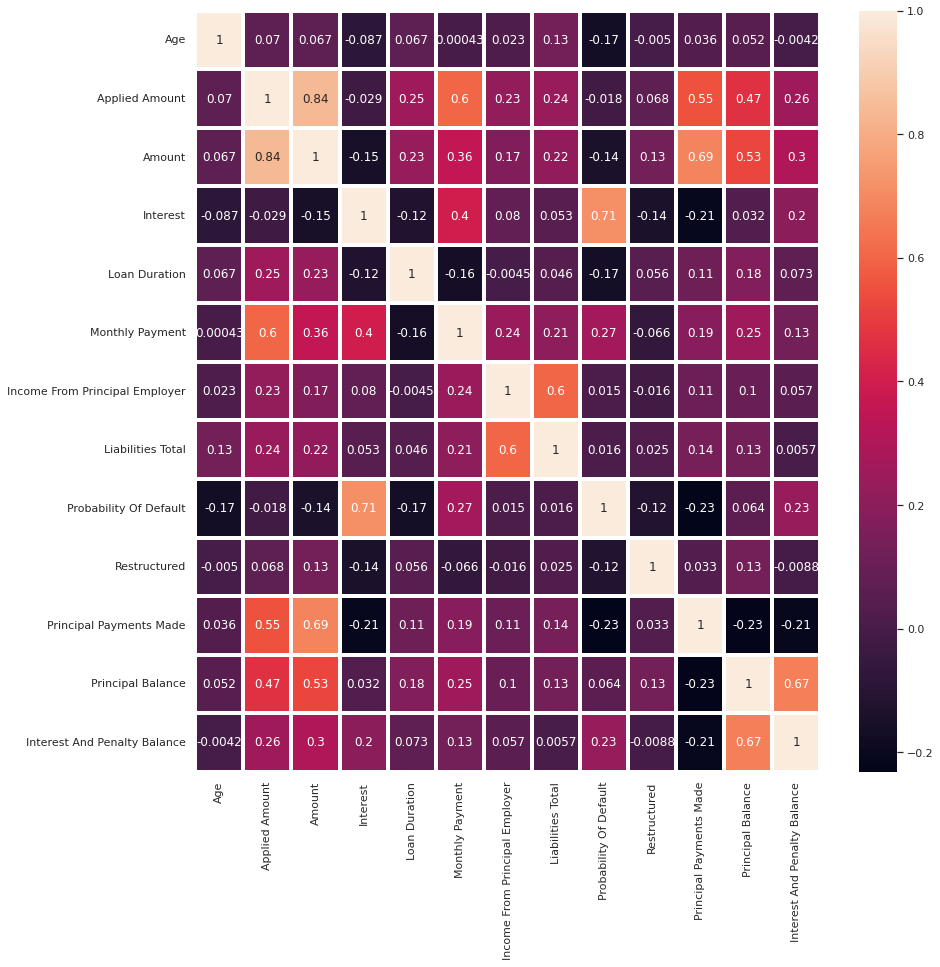

In [ ]:
# Heat map
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(correlation2, annot=True,linewidths=3, xticklabels=correlation2.columns, 
yticklabels=correlation2.columns, linecolor='white', cbar=True)

## Plots and Graphs

**Bar plots**

**Amount Bar Graphs**

[Text(0.5, 1.0, 'Amount Vs. Education')]

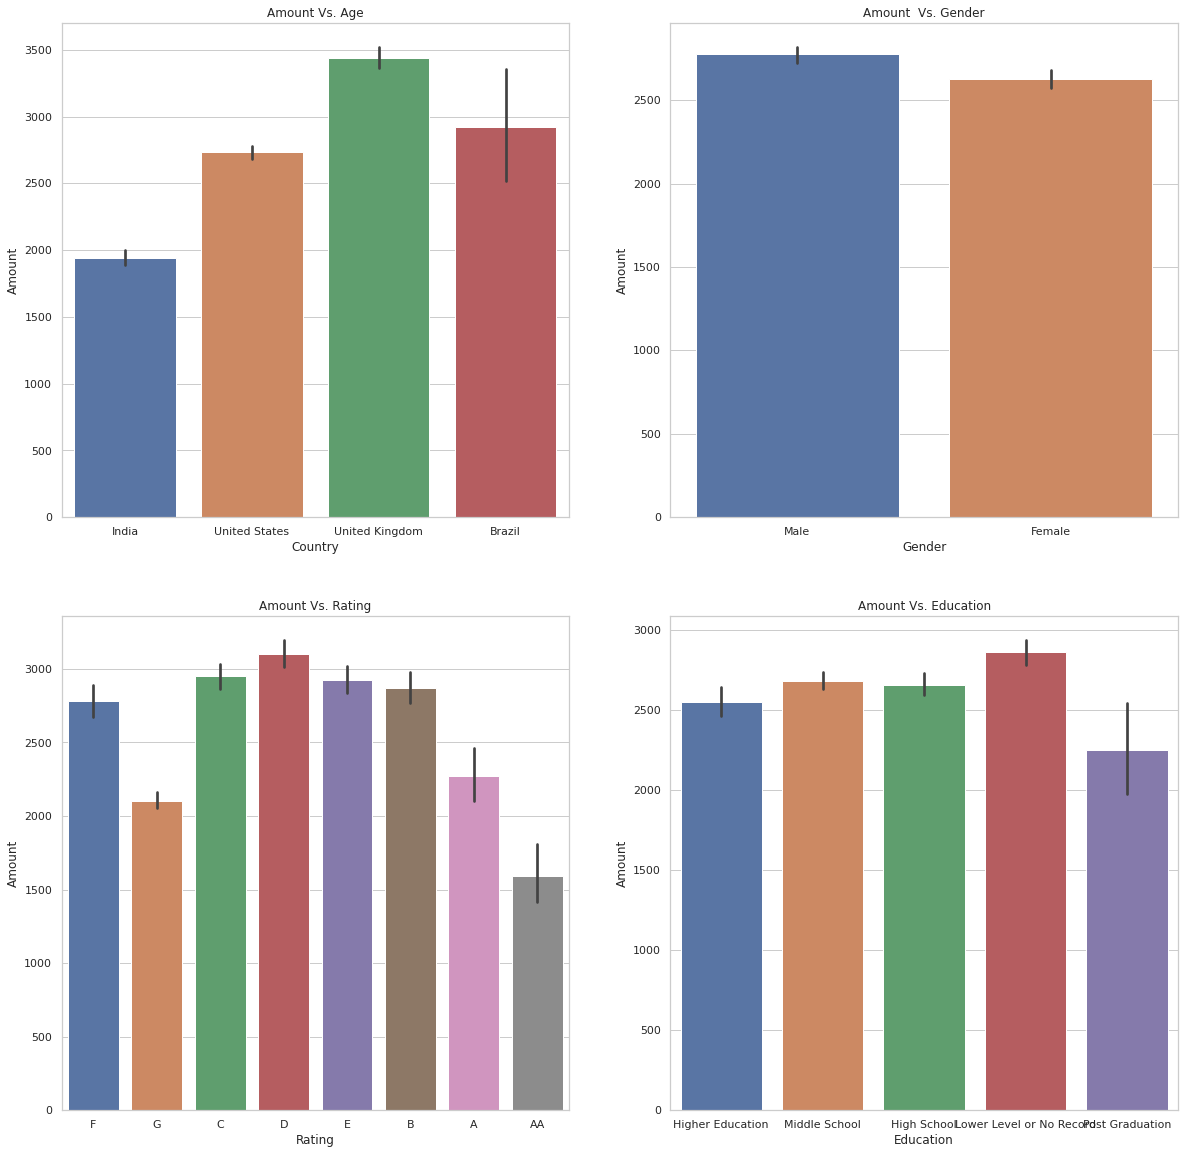

In [ ]:
# Bar Plot
plt.figure(figsize=(20,20))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.barplot(data=data,y='Amount',x='Country').set(title = "Amount Vs. Age")
plt.subplot(2,2,2)
sns.barplot(data=data,y='Amount',x='Gender').set(title = "Amount  Vs. Gender")
plt.subplot(2,2,3)
sns.barplot(data=data,y='Amount',x='Rating').set(title = "Amount Vs. Rating")
plt.subplot(2,2,4)
sns.barplot(data=data,y='Amount',x='Education').set(title = "Amount Vs. Education")

**Use of loan Bar Graph**

[Text(0.5, 1.0, 'Amount Vs. Use of loan')]

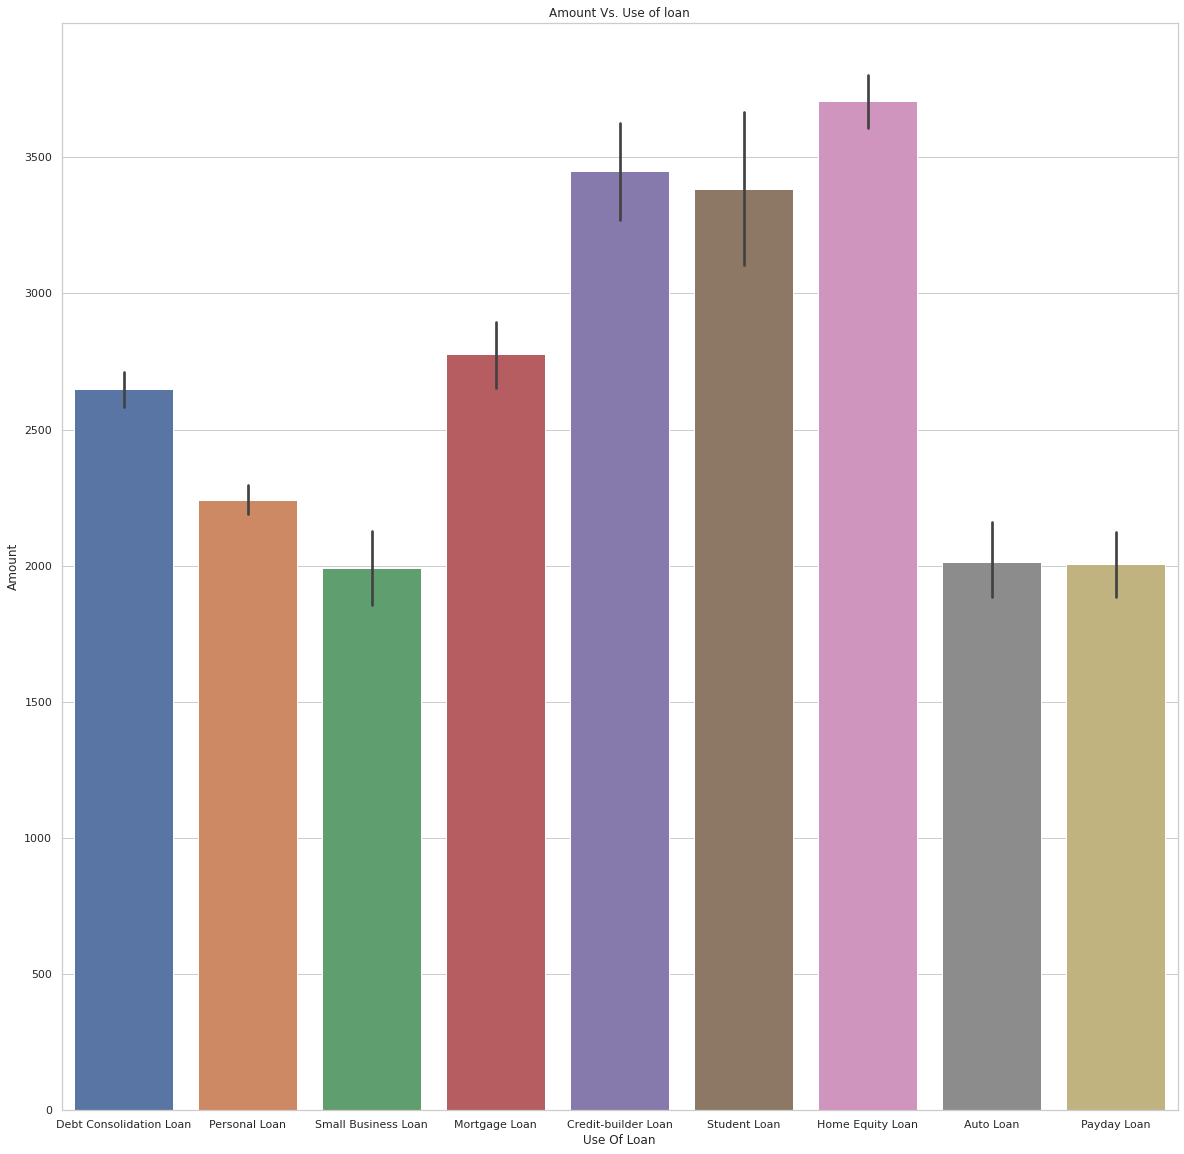

In [ ]:
plt.figure(figsize=(20,20))
sns.set_theme(style='whitegrid')
sns.barplot(data=data,y='Amount',x='Use Of Loan').set(title = "Amount Vs. Use of loan")

## Violinplot

**Amount violinplot**

[Text(0.5, 1.0, 'Amount Vs. Education')]

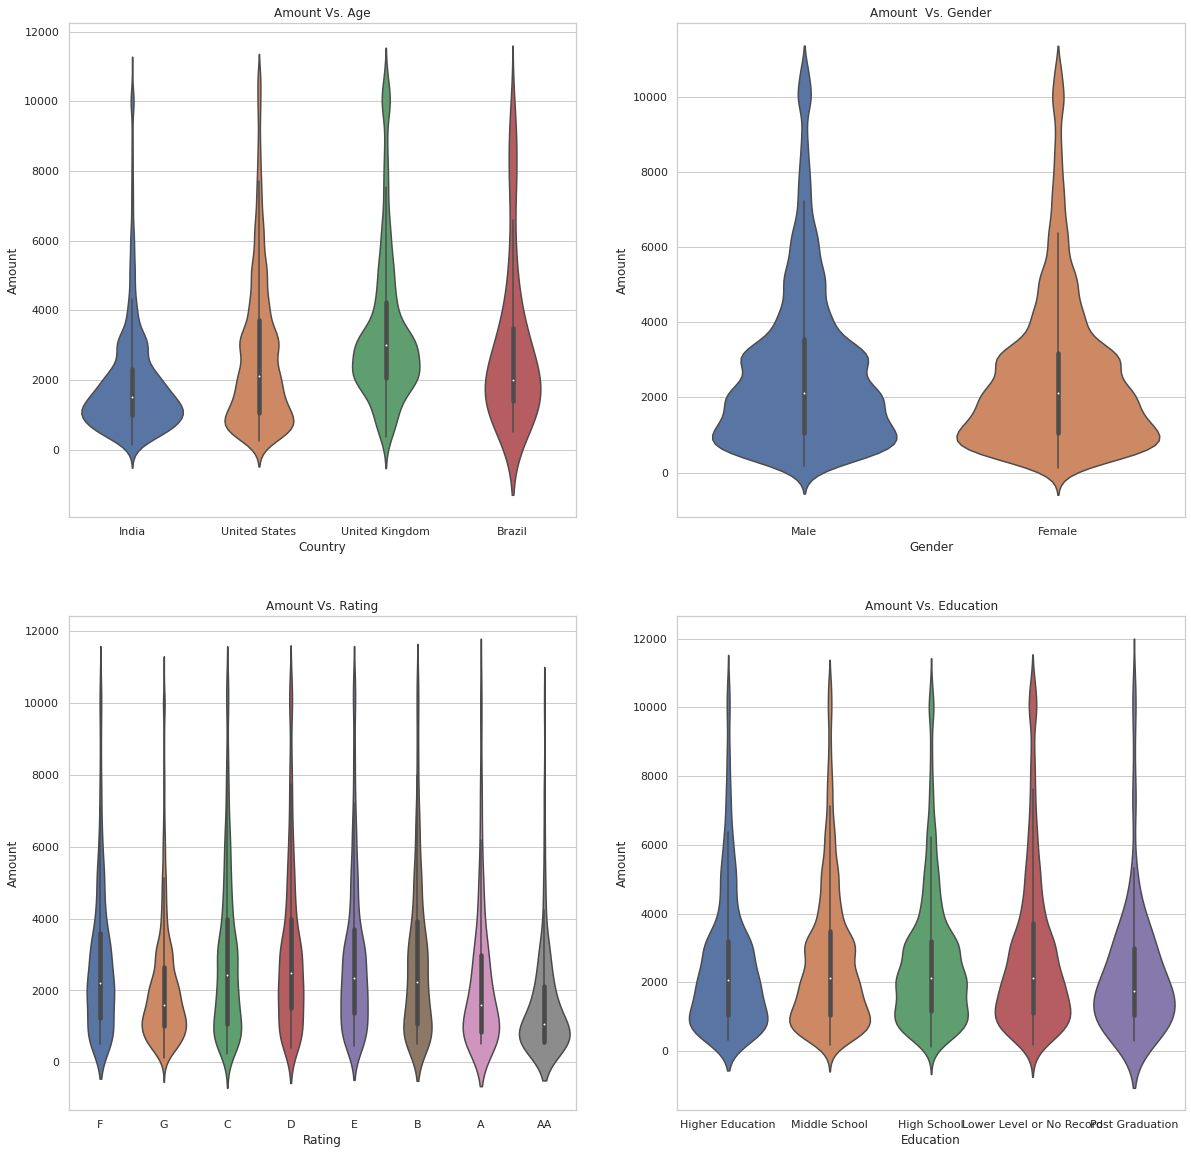

In [ ]:
plt.figure(figsize=(20,20))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.violinplot(data=data,y='Amount',x='Country').set(title = "Amount Vs. Age")
plt.subplot(2,2,2)
sns.violinplot(data=data,y='Amount',x='Gender').set(title = "Amount  Vs. Gender")
plt.subplot(2,2,3)
sns.violinplot(data=data,y='Amount',x='Rating').set(title = "Amount Vs. Rating")
plt.subplot(2,2,4)
sns.violinplot(data=data,y='Amount',x='Education').set(title = "Amount Vs. Education")

## Lineplots

[Text(0.5, 1.0, 'Amount Vs. Education')]

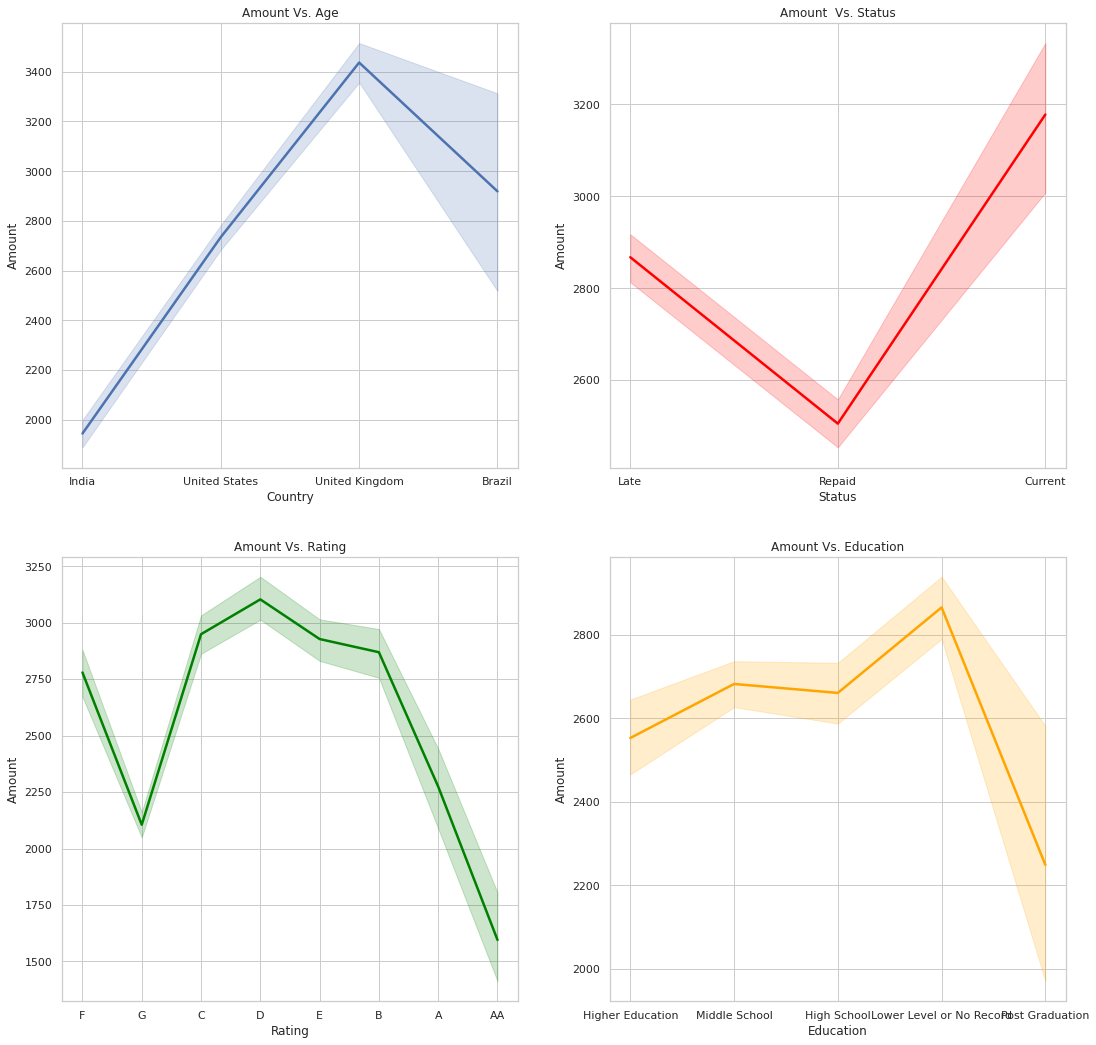

In [ ]:
plt.figure(figsize=(18,18))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.lineplot(data=data,y='Amount',x='Country',linewidth=2.5).set(title = "Amount Vs. Age")
plt.subplot(2,2,2)
sns.lineplot(data=data,y='Amount',x='Status',color='red',linewidth=2.5).set(title = "Amount  Vs. Status")
plt.subplot(2,2,3)
sns.lineplot(data=data,y='Amount',x='Rating',color='green',linewidth=2.5).set(title = "Amount Vs. Rating")
plt.subplot(2,2,4)
sns.lineplot(data=data,y='Amount',x='Education',color='orange',linewidth=2.5).set(title = "Amount Vs. Education")

---

### Dataframe with particular factors

In [ ]:
data1 = data[['Amount','Gender','Education','Rating','Status','Country']]
data1.head()

,Amount,Gender,Education,Rating,Status,Country
0,1500.0,Male,Higher Education,F,Late,India
1,1090.0,Female,Middle School,G,Late,India
2,775.0,Female,Middle School,G,Late,India
3,635.0,Male,Higher Education,F,Repaid,United States
4,1000.0,Male,High School,G,Repaid,India


### Plots and Graphs

[Text(0.5, 1.0, 'Amount Vs. Education')]

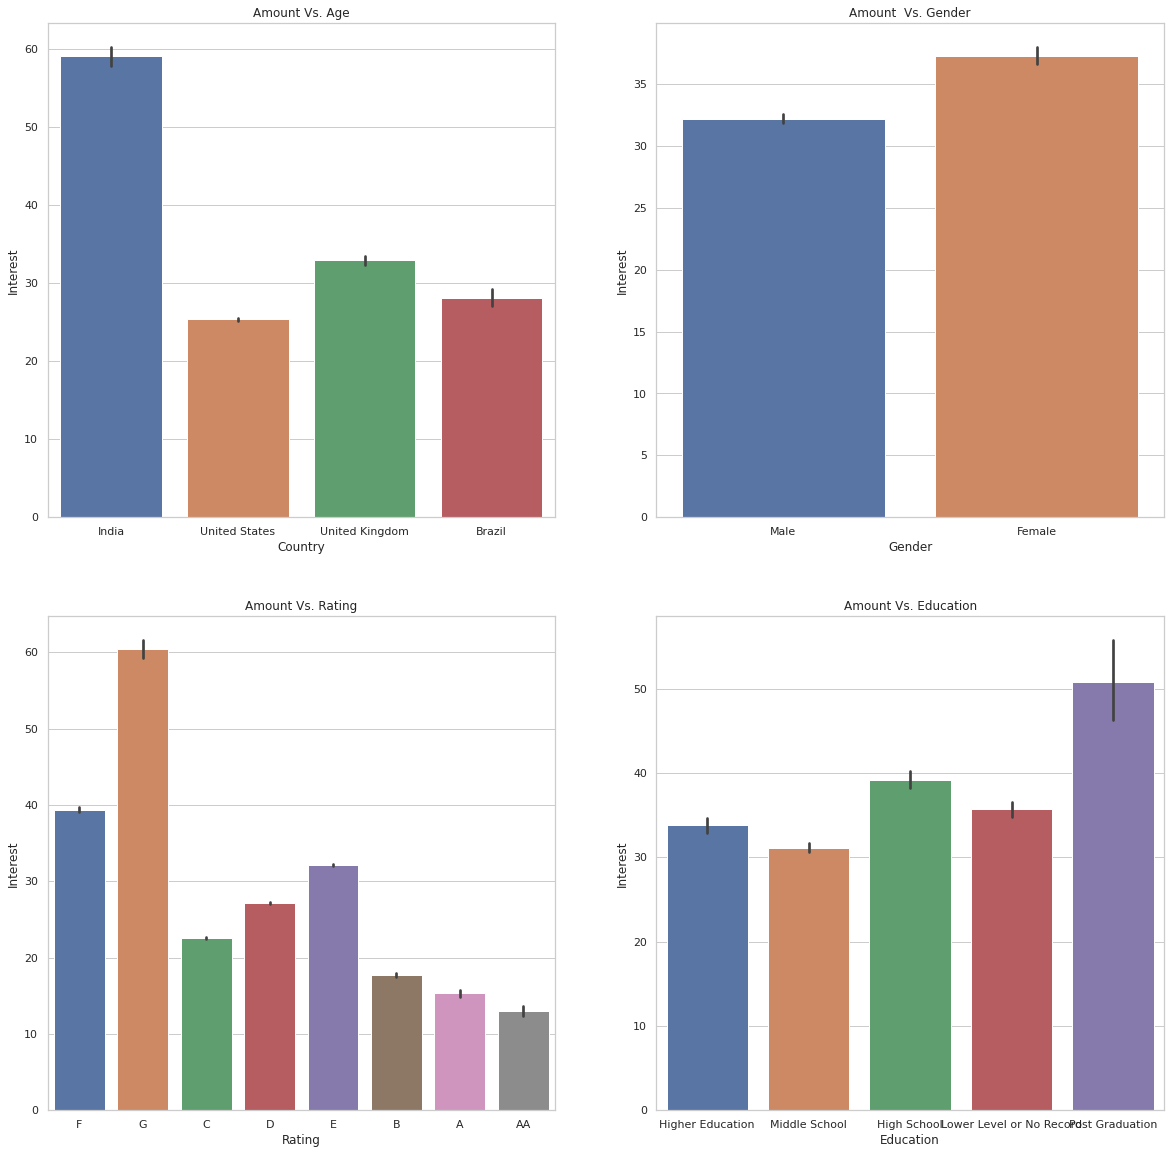

In [ ]:
plt.figure(figsize=(20,20))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.barplot(data=data,y='Interest',x='Country').set(title = "Amount Vs. Age")
plt.subplot(2,2,2)
sns.barplot(data=data,y='Interest',x='Gender').set(title = "Amount  Vs. Gender")
plt.subplot(2,2,3)
sns.barplot(data=data,y='Interest',x='Rating').set(title = "Amount Vs. Rating")
plt.subplot(2,2,4)
sns.barplot(data=data,y='Interest',x='Education').set(title = "Amount Vs. Education")

**Boxplots**

[Text(0.5, 1.0, 'Principal Balance Vs. Country')]

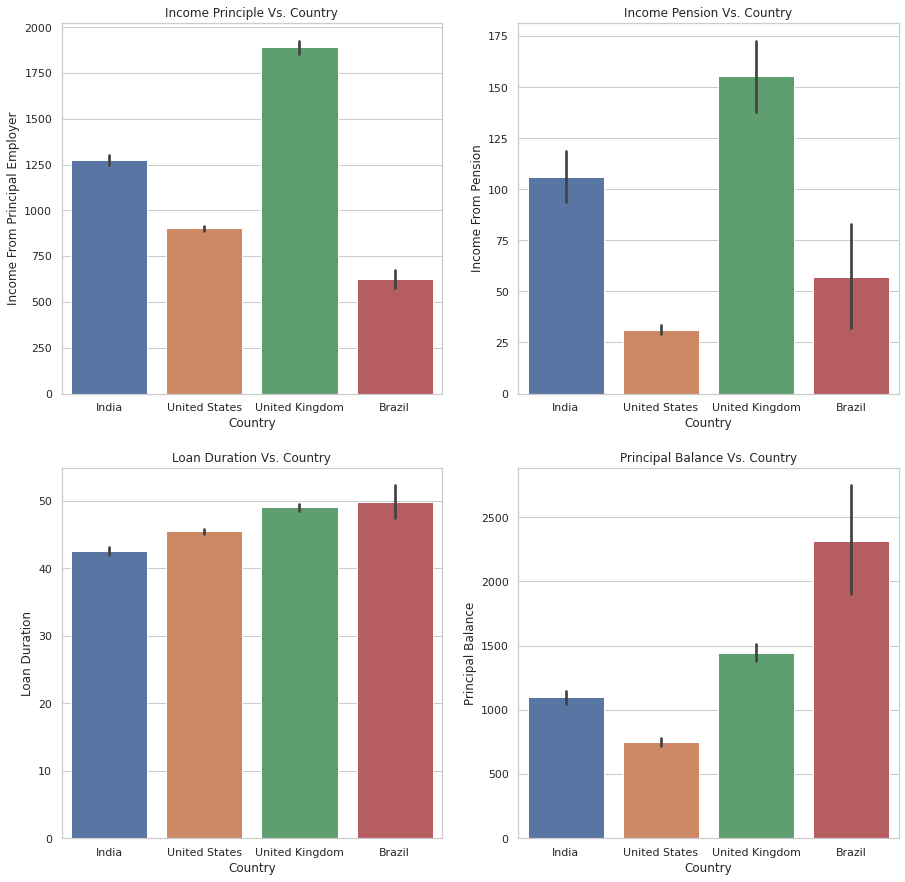

In [ ]:
plt.figure(figsize=(15,15))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.barplot(data=data,y='Income From Principal Employer',x='Country').set(title = "Income Principle Vs. Country")
plt.subplot(2,2,2)
sns.barplot(data=data,y='Income From Pension',x='Country').set(title = "Income Pension Vs. Country")
plt.subplot(2,2,3)
sns.barplot(data=data,y='Loan Duration',x='Country').set(title = "Loan Duration Vs. Country")
plt.subplot(2,2,4)
sns.barplot(data=data,y='Principal Balance',x='Country').set(title = "Principal Balance Vs. Country")

[Text(0.5, 1.0, 'Country Vs. Loan Duration')]

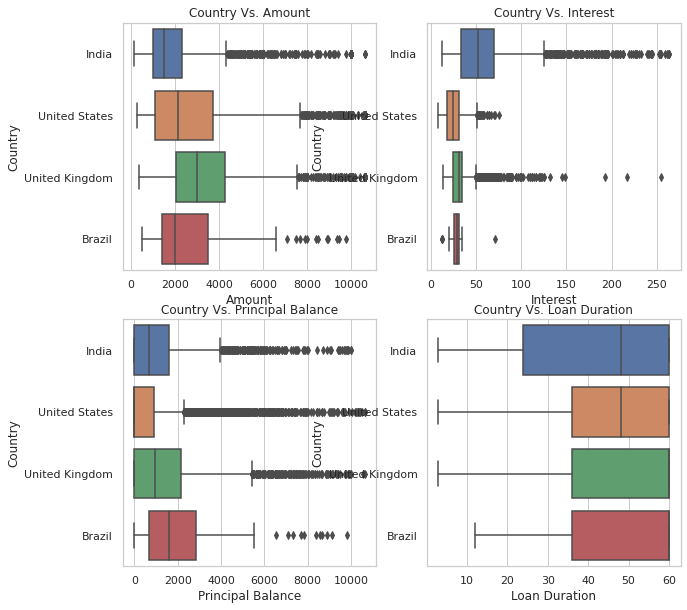

In [ ]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 7)
plt.subplot(2,2,1)
sns.boxplot(data=data,y='Country',x='Amount').set(title = "Country Vs. Amount")
plt.subplot(2,2,2)
plt.ylim(0, 7)
sns.boxplot(data=data,y='Country',x='Interest').set(title = "Country Vs. Interest")
plt.subplot(2,2,3)
plt.ylim(0, 7)
sns.boxplot(data=data,y='Country',x='Principal Balance').set(title = "Country Vs. Principal Balance")
plt.subplot(2,2,4)
plt.ylim(0, 7)
sns.boxplot(data=data,y='Country',x='Loan Duration').set(title = "Country Vs. Loan Duration")

[Text(0.5, 1.0, 'Monthly Payment Vs. Country')]

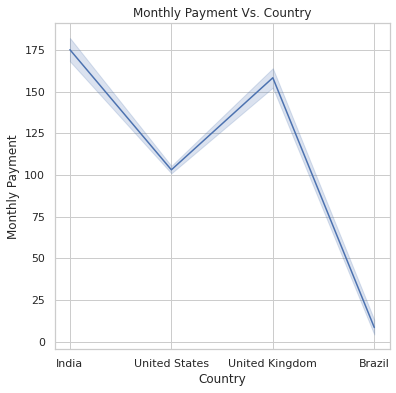

In [ ]:
plt.figure(figsize=(6,6))
sns.set_theme(style='whitegrid')
sns.lineplot(data=data,y='Monthly Payment',x='Country').set(title = "Monthly Payment Vs. Country")

---

**Pie Charts**

In [ ]:
F = df.Gender[df.Gender == 'Female'].count()
M = df.Gender[df.Gender == 'Male'].count()

In [ ]:
L = df.Status[df.Status =='Late'].count()
R = df.Status[df.Status =='Repaid'].count()

**1. Gender**

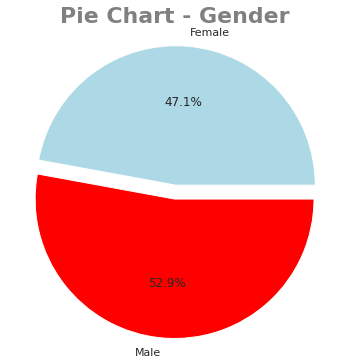

In [ ]:
gender_num = [F,M]
labels = ["Female","Male"]
pie_colors=['lightblue','red']
plt.figure(figsize=(6,6))
plt.pie(gender_num,labels=labels,colors=pie_colors,explode=[0.1,0], autopct='%1.1f%%')
plt.title('Pie Chart - Gender',fontweight='bold', fontsize=22, color='grey')
plt.axis('equal')
plt.show()

**2. Status**

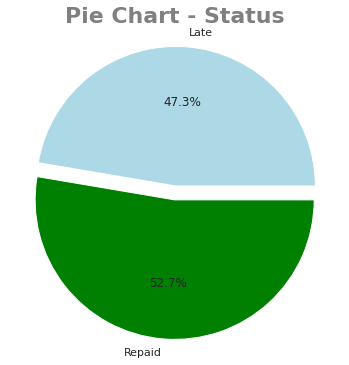

In [ ]:
status_num = [L,R]
labels = ["Late","Repaid"]
pie_colors=['lightblue','green']
plt.figure(figsize=(6,6))
plt.pie(status_num,labels=labels,colors=pie_colors,explode=[0.1,0], autopct='%1.1f%%')
plt.title('Pie Chart - Status',fontweight='bold', fontsize=22, color='grey')
plt.axis('equal')
plt.show()

**3. Country**

In [ ]:
I = df.Country[df.Country =='India'].count()
US = df.Country[df.Country =='United States'].count()
UK = df.Country[df.Country =='United Kingdom'].count()
B = df.Country[df.Country =='Brazil'].count()

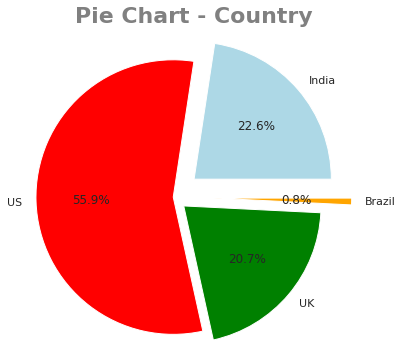

In [ ]:
c_num = [I,US,UK,B]
labels = ["India","US","UK","Brazil"]
pie_colors=['lightblue','red',"green","orange"]
plt.figure(figsize=(6,6))
plt.pie(c_num,labels=labels,colors=pie_colors,explode=[0.2,0,0.1,0.3], autopct='%1.1f%%')
plt.title('Pie Chart - Country',fontweight='bold', fontsize=22, color='grey')
plt.axis('equal')
plt.show()

---

**Country in which the business can be shut down**





In [ ]:
import plotly.express as px

country = df['Country'].unique().tolist()

freq=[]
for i in range(0,len(country)):
    count=0
    for j in range(0,len(df)):
        if (df.loc[j,'Country']==country[i]):
            count+=1
    freq.append(count)


country_df=pd.DataFrame({'Country':country,'Frequency':freq})
print(country_df)

fig = px.histogram(country_df,x="Country",y="Frequency",color="Country",title="Distribution of all countries",
                   labels={
                     "Country": "Country",
                     "Frequency": "Frequency"
                 })
fig.update_layout(bargap=0.2)
fig.show()

          Country  Frequency
0           India       3216
1   United States       7952
2  United Kingdom       2953
3          Brazil        113


*Conclusion:*
1. India has the highest probability of default on an average plus the highest interest. 
2. USA has the lowest probability of default and interest. Hence, the company should stop in India due to high probability of default.

[Text(0.5, 1.0, 'Loan Duration Vs. Country')]

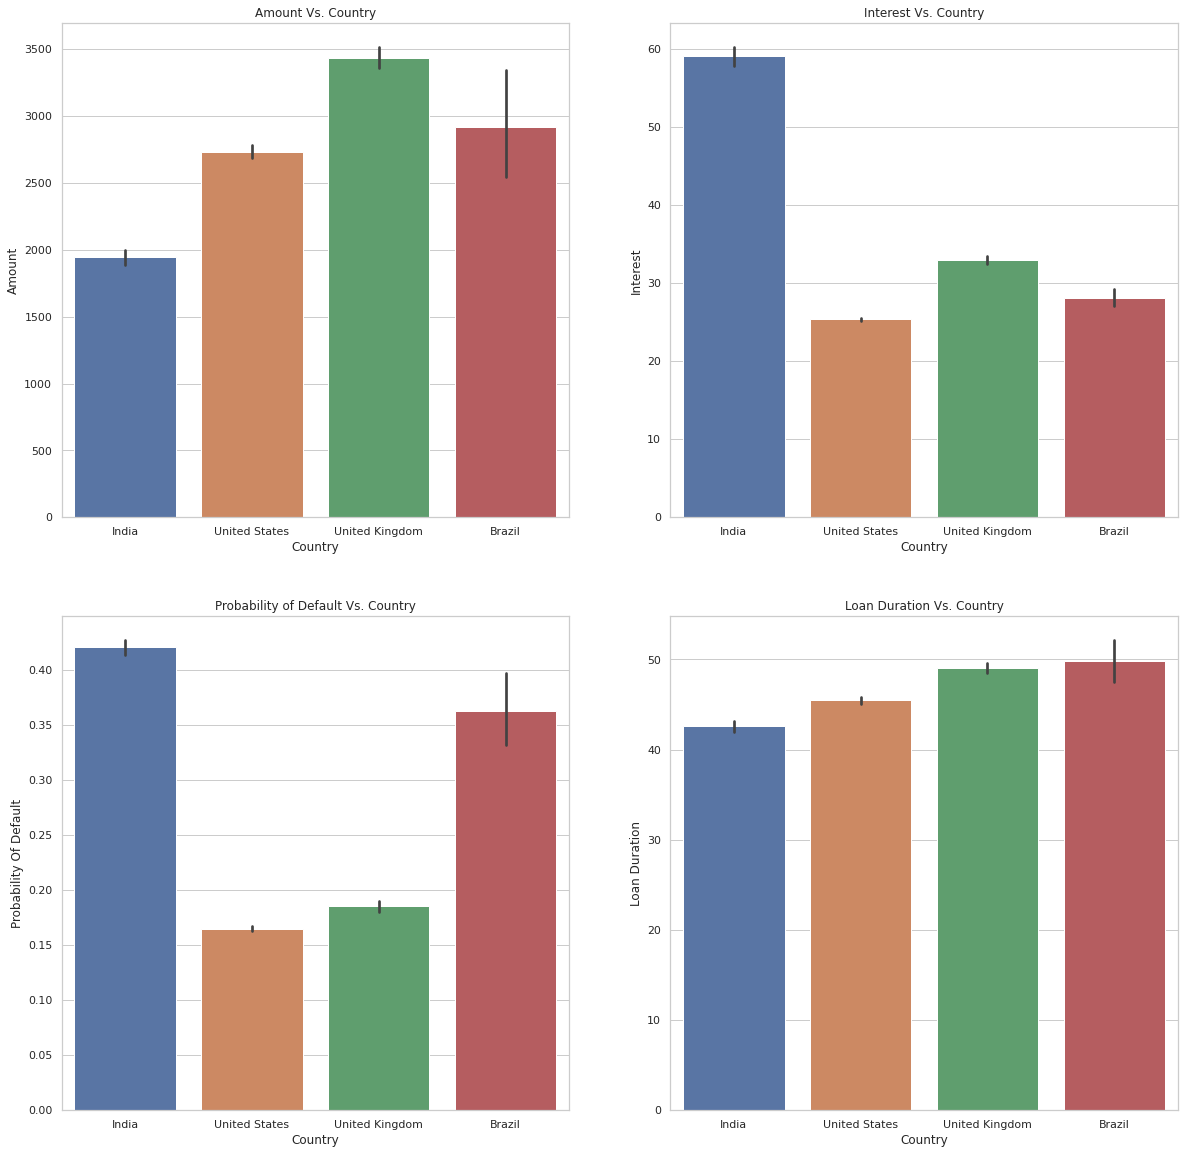

In [ ]:
plt.figure(figsize=(20,20))
sns.set_theme(style='whitegrid')
plt.subplot(2,2,1)
sns.barplot(data=data,y='Amount',x='Country').set(title = "Amount Vs. Country")
plt.subplot(2,2,2)
sns.barplot(data=data,y='Interest',x='Country').set(title = "Interest Vs. Country")
plt.subplot(2,2,3)
sns.barplot(data=data,y='Probability Of Default',x='Country').set(title = "Probability of Default Vs. Country")
plt.subplot(2,2,4)
sns.barplot(data=data,y='Loan Duration',x='Country').set(title = "Loan Duration Vs. Country")

India has the highest probability of default on an average plus the highest interest. USA has the lowest probability of default and interest.
Hence, the company should stop in India due to high probability of default.

In [76]:
prob=df[['Age','Amount','Interest','Loan Duration','Monthly Payment','Restructured','Interest And Penalty Balance']]
prob.head()


,Age,Amount,Interest,Loan Duration,Monthly Payment,Restructured,Interest And Penalty Balance
0,42,1500.0,40.40,60,63.53,False,2833.83
1,34,1090.0,68.39,48,101.19,False,4215.37
2,31,775.0,73.73,60,243.19,False,3283.25
3,22,635.0,42.66,60,27.12,False,0.00
4,47,1000.0,61.49,12,116.95,False,0.00
